<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

# Final Project KASDD
## Kelompok Kasded Sukses Sejahtera
Anggota:

Adrian Ardizza - 2006524896 - KASDD D

Fransisco William Sudianto - 2006596535 - KASDD D

M Abdurahman Basyah - 2006597241 - KASDD A

Muhammad Fadhlan - 1806205060 - KASDD F


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from numpy import where
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pointbiserialr

## Section 1: Exploratory Data Analysis

### Initial Dataset Loading

In [2]:
kos = pd.read_csv('rumah_kos.csv')
kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9459.0,15769.0,7131.0,35.0,700000.0,4.0,4,campur
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,9740.0,409.0,10582.0,9.0,2000000.0,6.0,3,campur
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1095.0,9261.0,2053.0,12.0,545000.0,1.0,14,putri
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3955.0,7319.0,3675.0,9.0,500000.0,5.0,62,putri
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6672.0,15763.0,7996.0,9.0,1500000.0,20.0,22,putri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3737.0,13349.0,5021.0,9.0,700000.0,5.0,16,putri
3289,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2625.0,9410.0,1507.0,12.0,300000.0,26.0,104,putri
3290,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,7350.0,NaN,8176.0,9.0,675000.0,7.0,3,putra
3291,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4745.0,14483.0,3764.0,12.0,600000.0,16.0,79,putra


### Dataset Characteristics

#### Shape

In [3]:
kos.shape

(3293, 16)

The given dataset has dimensions of 3293 rows and 16 columns. In this dataset, 7 features are numerical features, 1 feature (gender) is a categorical feature, and the 8 remaining features are binary features with possible values of 0 or 1.

### Information

In [4]:
kos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fasilitas_1           3230 non-null   float64
 1   fasilitas_2           3219 non-null   float64
 2   fasilitas_3           3231 non-null   float64
 3   fasilitas_4           3222 non-null   float64
 4   fasilitas_5           3221 non-null   float64
 5   fasilitas_6           3229 non-null   float64
 6   fasilitas_7           3215 non-null   float64
 7   fasilitas_8           3225 non-null   float64
 8   jarak_poi_1           3226 non-null   float64
 9   jarak_poi_2           3226 non-null   float64
 10  jarak_poi_3           3207 non-null   float64
 11  luas_kamar            3225 non-null   float64
 12  harga_bulanan         3208 non-null   float64
 13  banyak_kamar          3223 non-null   float64
 14  banyak_pencarian_kos  3293 non-null   int64  
 15  gender               

In [5]:
kos.describe()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos
count,3230.000000,3219.000000,3231.000000,3222.000000,3221.000000,3229.000000,3215.000000,3225.000000,3226.000000,3226.000000,3207.000000,3225.000000,3.208000e+03,3223.000000,3293.000000
mean,0.261610,0.608263,0.456515,0.562384,0.641416,0.427687,0.004666,0.518450,4679.478921,9920.515189,4906.215778,12.143745,8.975029e+05,10.506050,35.362587
std,0.439579,0.488214,0.498183,0.496170,0.479659,0.494820,0.068156,0.499737,3569.137245,4714.800696,3617.408043,4.951679,6.501208e+05,9.565184,47.269615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,519.000000,168.000000,324.000000,6.000000,1.550000e+05,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2355.500000,7875.750000,2693.000000,9.000000,5.000000e+05,4.000000,8.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3961.000000,9241.000000,3927.000000,12.000000,6.500000e+05,8.000000,20.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5900.750000,12422.750000,6099.000000,12.250000,1.200000e+06,14.000000,44.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48675.000000,55105.000000,46517.000000,48.000000,5.000000e+06,121.000000,769.000000


### Correlations

#### Numerical Feature Correlation

<AxesSubplot:>

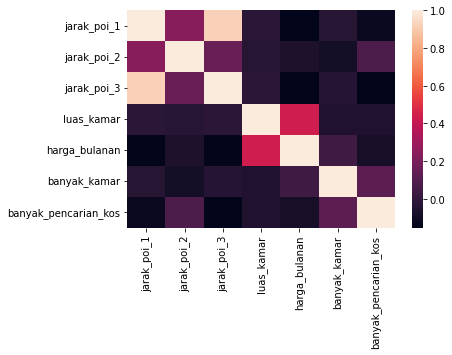

In [6]:
sns.heatmap(kos[["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "harga_bulanan", "banyak_kamar", "banyak_pencarian_kos"]].corr())

#### Correlation of Facilities to Monthly Price
We use the point biserial method of correlation here to handle finding the correlation between discrete and numerical features.

In [7]:
categorical = kos.drop(["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "banyak_kamar", "banyak_pencarian_kos", "harga_bulanan", "gender"], axis=1)
categorical

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3289,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3290,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3291,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

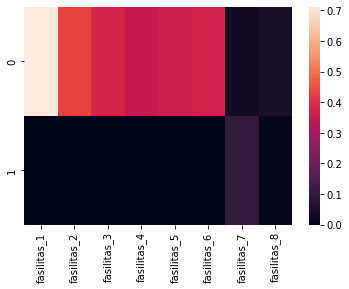

In [8]:
sns.heatmap(categorical.corrwith(kos['harga_bulanan'].astype('float'), method=pointbiserialr))

#### Pairplot of Dataset Features

#### Numerical Features

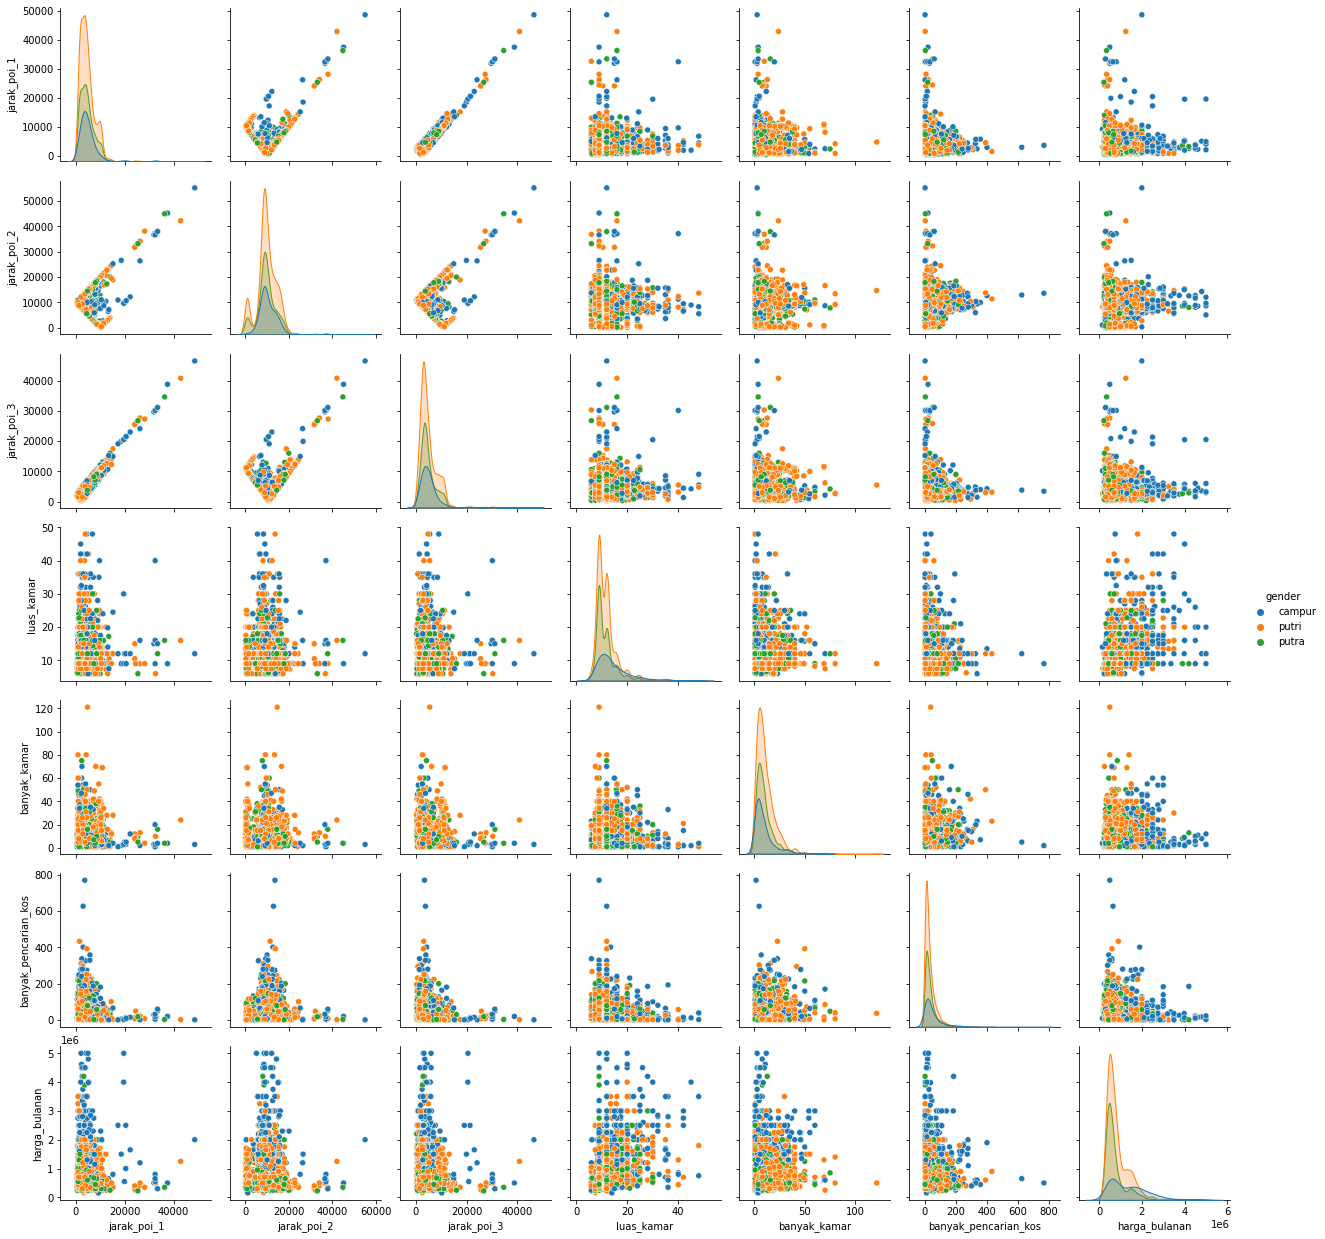

In [9]:
sns.pairplot(data=kos[["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "banyak_kamar", "banyak_pencarian_kos", "harga_bulanan", "gender"]], hue="gender")

<AxesSubplot:xlabel='jarak_poi_1'>

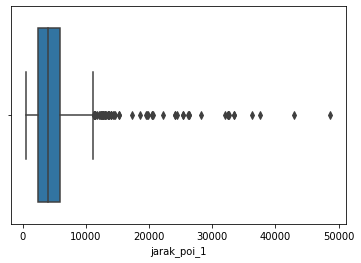

In [10]:
# find outliers of jarak_poi_1 by boxplot
sns.boxplot(x=kos['jarak_poi_1'])



C:\Users\Abduh\AppData\Local\Temp\ipykernel_452\4176961944.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_numerical.iloc[:, i], ax=ax, color=colors[i])
C:\Users\Abduh\AppData\Local\Temp\ipykernel_452\4176961944.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_numerical.iloc[:, i], 

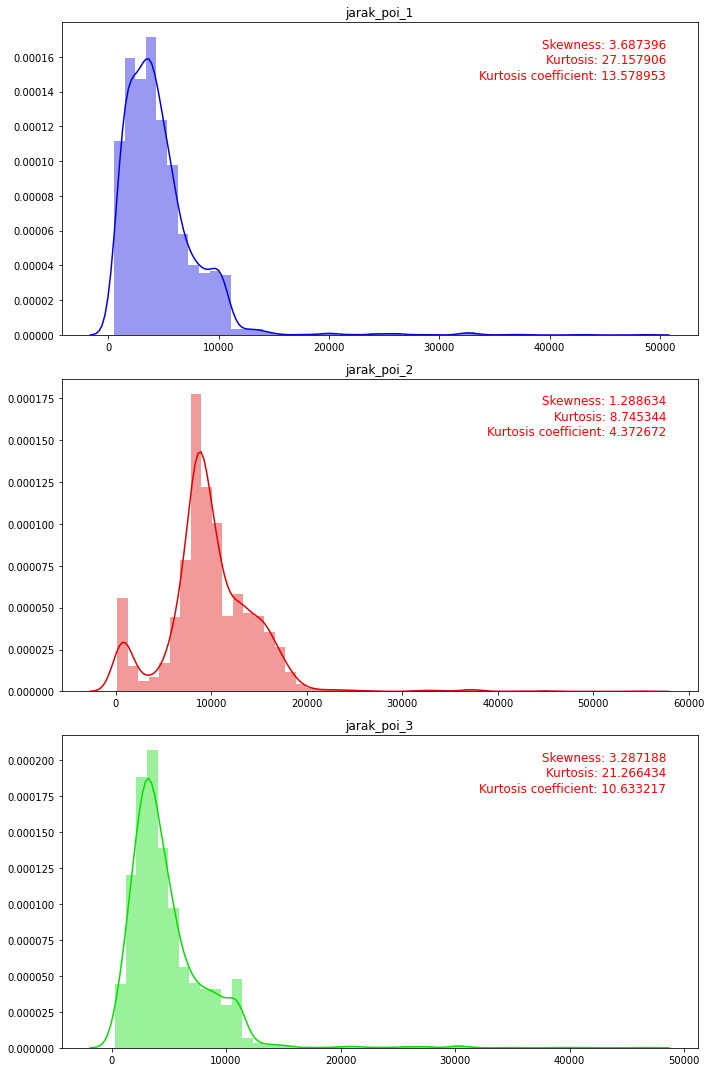

In [11]:
df_numerical = kos[["jarak_poi_1", "jarak_poi_2", "jarak_poi_3"]]
f, axes = pyplot.subplots(3, 1, figsize=(10, 15))
colors = ["#0101DF", "#DF0101", "#01DF01", "#DFDF01"]
for i, ax in enumerate(axes.flat):
    ax.set_facecolor('white')
    sns.distplot(df_numerical.iloc[:, i], ax=ax, color=colors[i])
    ax.set_title(df_numerical.columns[i])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    # skewness and kurtosis
    ax.text(0.95, 0.95, 'Skewness: %f' % df_numerical.iloc[:, i].skew(), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, color='red', fontsize=12)
    ax.text(0.95, 0.90, 'Kurtosis: %f' % df_numerical.iloc[:, i].kurt(), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, color='red', fontsize=12)

    # kurtosis coefficient
    ax.text(0.95, 0.85, 'Kurtosis coefficient: %f' % (df_numerical.iloc[:, i].kurt() / 2), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, color='red', fontsize=12)
pyplot.tight_layout()
pyplot.show()



#### Exploration

##### Facilities with Monthly Price

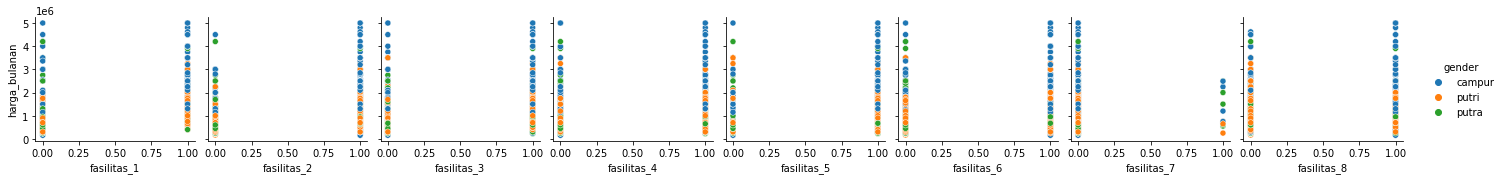

In [12]:
sns.pairplot(data=kos, y_vars=['harga_bulanan'], x_vars=[f'fasilitas_{i}' for i in range(1, 9)], hue='gender')

Secara individu, sebuah fasilitas tidak begitu berpengaruh terhadap pola harga bulanan karena pada sebagian besar kosan, terdapat lebih dari 1 fasilitas yang berkontribusi terhadap harganya. Sehingga pada tahap selanjutnya kita harus mempelajari hubungan antara keberadaan **beberapa** fasilitas pada suatu kos terhadap harga sewa-nya.

In [13]:
# correlation between fasilitas 1-8 and harga bulanan
df_fasilitas_harga = kos[["fasilitas_1", "fasilitas_2", "fasilitas_3", "fasilitas_4", "fasilitas_5", "fasilitas_6", "fasilitas_7", "fasilitas_8", "harga_bulanan"]]
df_fasilitas_harga.corr()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,harga_bulanan
fasilitas_1,1.000000,0.377230,0.403441,0.400784,0.393130,0.379319,0.032635,0.013266,0.710774
fasilitas_2,0.377230,1.000000,0.287244,0.237641,0.213347,0.293454,-0.008993,0.017943,0.427765
fasilitas_3,0.403441,0.287244,1.000000,0.347064,0.305743,0.247057,0.001422,0.088320,0.379932
fasilitas_4,0.400784,0.237641,0.347064,1.000000,0.776843,0.184020,0.023992,0.018906,0.347418
fasilitas_5,0.393130,0.213347,0.305743,0.776843,1.000000,0.155882,0.023127,-0.011222,0.359925
fasilitas_6,0.379319,0.293454,0.247057,0.184020,0.155882,1.000000,0.024227,0.043058,0.371077
fasilitas_7,0.032635,-0.008993,0.001422,0.023992,0.023127,0.024227,1.000000,0.048397,0.029470
fasilitas_8,0.013266,0.017943,0.088320,0.018906,-0.011222,0.043058,0.048397,1.000000,0.045579
harga_bulanan,0.710774,0.427765,0.379932,0.347418,0.359925,0.371077,0.029470,0.045579,1.000000


#### Correlation between Sets of Facilities to Gender

##### Kos Putri

In [14]:
female_kos = kos[kos["gender"] == "putri"].dropna()
female_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1095.0,9261.0,2053.0,12.0,545000.0,1.0,14,putri
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3955.0,7319.0,3675.0,9.0,500000.0,5.0,62,putri
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6672.0,15763.0,7996.0,9.0,1500000.0,20.0,22,putri
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,14043.0,23969.0,13225.0,12.0,400000.0,1.0,17,putri
9,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,4796.0,12331.0,2467.0,13.5,1300000.0,5.0,41,putri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8840.0,18825.0,8225.0,7.5,400000.0,8.0,32,putri
3287,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5430.0,15345.0,4755.0,25.0,900000.0,8.0,3,putri
3288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3737.0,13349.0,5021.0,9.0,700000.0,5.0,16,putri
3289,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2625.0,9410.0,1507.0,12.0,300000.0,26.0,104,putri


In [15]:
female_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


Apabila kita melakukan filter terhadap semua kos putri yang ada pada dataset, maka terlihat bahwa sebagian besar kos putri memiliki fasilitas_2 sampai dengan fasilitas_5 terpenuhi berdasarkan modus dari setiap fasilitas yang ada. Untuk mendapatkan gambaran yang lebih lengkap mengenai hal tersebut, maka kita dapat menghitung persentase kos yang memiliki fitur-fitur tersebut.

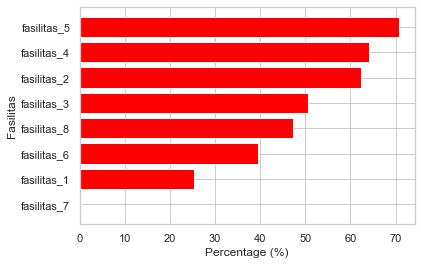

In [104]:
count = {}
for i in range(1, 9):
    percent = (len(female_kos[female_kos[f"fasilitas_{i}"]== 1]) / len(female_kos)) * 100
    count[f"fasilitas_{i}"] = percent

pd.DataFrame(count, index=["Overall"])
sorted_count = sorted(count.items(), key=lambda x: x[1], reverse=False)
pyplot.barh(*zip(*sorted_count), color="red")
pyplot.xlabel("Percentage (%)")
pyplot.ylabel("Fasilitas")
pyplot.show()


Berdasarkan perhitungan yang telah dilakukan diatas, terlihat bahwa fasilitas 2, 3, 4, 5 muncul di setidaknya 50% dari kos putri yang ada, fasilitas 8 pada 47% dari semua kos putri, fasilitas 6 pada 36% dari seluruh kos putri, fasilitas 1 ada pada 25% dari kos putri, dan fasilitas 7 tidak ada di hampir semua kos putri.

##### Kos Putra

In [17]:
male_kos = kos[kos["gender"] == "putra"].dropna()
male_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
8,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3821.0,8979.0,2539.0,9.0,850000.0,20.0,18,putra
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1694.0,8378.0,3365.0,12.0,700000.0,12.0,34,putra
30,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2780.0,8159.0,4874.0,9.0,1000000.0,3.0,18,putra
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4210.0,9901.0,2390.0,9.0,500000.0,9.0,5,putra
41,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,749.0,9676.0,1883.0,9.0,500000.0,10.0,6,putra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2176.0,8682.0,4353.0,9.0,400000.0,5.0,46,putra
3249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6826.0,15092.0,4751.0,16.0,450000.0,4.0,4,putra
3263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,914.0,10963.0,2330.0,12.0,550000.0,8.0,30,putra
3278,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,4449.0,5599.0,5464.0,18.0,950000.0,1.0,5,putra


In [18]:
male_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Berbeda dengan kos putri, pada umumnya kos putra hanya memiliki fasilitas 5, dan 8, dengan sebagian besar fasilitas yang lain-nya tidak ada pada sebagian besar kos putra. Persentase keberadaan fasilitas pada kos putra dapat dilihat sebagai berikut:

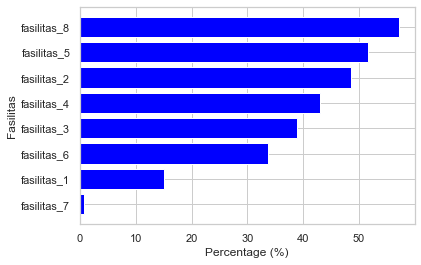

In [107]:
count = {}
for i in range(1, 9):
    percent = (len(male_kos[male_kos[f"fasilitas_{i}"]== 1]) / len(male_kos)) * 100
    count[f"fasilitas_{i}"] = percent

pd.DataFrame(count, index=["Overall"])
sorted_count = sorted(count.items(), key=lambda x: x[1], reverse=False)
pyplot.barh(*zip(*sorted_count), color="blue")
pyplot.xlabel("Percentage (%)")
pyplot.ylabel("Fasilitas")
pyplot.show()

Berdasarkan perhitungan diatas, terlihat bahwa sebagian besar kos pria memiliki fasilitas_5 dan fasilitas_8, dengan beberapa fasilitas lain seperti fasilitas_2 dan fasilitas_4 dimiliki oleh setidaknya 42% dari kos pria. Lalu setidaknya 33% kos pria memiliki fasilitas_3 dan fasilitas_6.

Menariknya, sama seperti pada kos putri, jumlah kos putra yang memiliki fasilitas_7 sangat sedikit (hanya 0.63%). Hal ini menunjukkan bahwa keberdaan fasilitas_7 tidak begitu dipengaruhi oleh tipe gender dari kosan

##### Kos Campur

In [20]:
mixed_kos = kos[kos["gender"] == "campur"].dropna()
mixed_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9459.0,15769.0,7131.0,35.0,700000.0,4.0,4,campur
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,9740.0,409.0,10582.0,9.0,2000000.0,6.0,3,campur
5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5651.0,10730.0,3598.0,12.0,1500000.0,6.0,9,campur
22,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2063.0,9207.0,1626.0,12.0,600000.0,4.0,29,campur
25,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,9640.0,900.0,10253.0,9.0,750000.0,10.0,25,campur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,4543.0,9367.0,6863.0,9.0,2250000.0,12.0,42,campur
3256,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1489.0,8566.0,3146.0,12.0,1600000.0,34.0,34,campur
3266,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6259.0,10288.0,4367.0,12.0,700000.0,11.0,10,campur
3272,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7732.0,9083.0,6247.0,16.0,1150000.0,2.0,19,campur


In [21]:
mixed_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


Pada umumnya kos campur pada dataset memiliki fasilitas_2, fasilitas_4, fasilitas_5, fasilitas_6, dan fasilitas_8. Hal ini sepertinya merupakan sebuah overlap antara fasilitas-fasilitas yang paling sering muncul pada kos putra dengan yang paling sering muncul di kos putri.

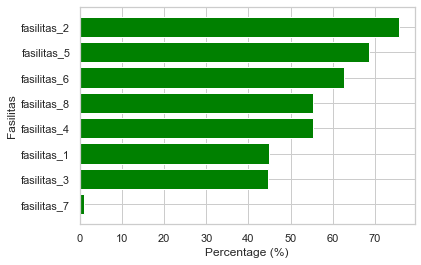

In [108]:
count = {}
for i in range(1, 9):
    percent = (len(mixed_kos[mixed_kos[f"fasilitas_{i}"]== 1]) / len(mixed_kos)) * 100
    count[f"fasilitas_{i}"] = percent

pd.DataFrame(count, index=["Overall"])
sorted_count = sorted(count.items(), key=lambda x: x[1], reverse=False)
pyplot.barh(*zip(*sorted_count), color="green")
pyplot.xlabel("Percentage (%)")
pyplot.ylabel("Fasilitas")
pyplot.show()

### Correlation between kos room area and number of search to price

Sebelum mencari korelasi antara luas kamar dan banyak pencarian terhadap harga bulanan, dibuat dataframe baru dengan kolom luas kamar, banyak pencarian kos, dan harga bulanan. Setelah itu, ditambahkan kolom baru dengan mengkalkulasi perkalian dari  banyak kamar dan luas kamar

C:\Users\Abduh\AppData\Local\Temp\ipykernel_452\3675201770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_luas_kamar_banyak_pencarian_harga['total_luas_kamar'] = kos["luas_kamar"] * kos["banyak_kamar"]


<AxesSubplot:>

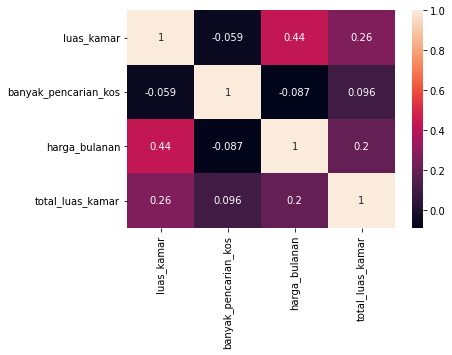

In [66]:
df_luas_kamar_banyak_pencarian_harga = kos[["luas_kamar", "banyak_pencarian_kos", "harga_bulanan"]]
df_luas_kamar_banyak_pencarian_harga['total_luas_kamar'] = kos["luas_kamar"] * kos["banyak_kamar"]
sns.heatmap(df_luas_kamar_banyak_pencarian_harga.corr(), annot=True)


Dapat dilihat bahwa baik luas kamar secara satuan atau secara keseluruhan dari sebuah kos mendapatkan korelasi yang positif terhadap harga bulanan dari sebuah kamar kos. Namun, korelasi banyaknya pencarian dengan setiap fitur lainnya mendekati angka 0. Hasil ini dapat memberikan dugaan bahwa harga bulanan tidak berpengaruh banyak terhadap banyaknya pencarian kos

### Correlation between number of facility with price

<AxesSubplot:>

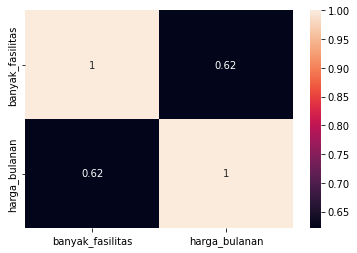

In [69]:
facilities_price = kos.drop(["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "banyak_kamar", "banyak_pencarian_kos", "gender"], axis=1)
facilities_price['banyak_fasilitas'] = kos[[f"fasilitas_{i}" for i in range(1, 9)]].sum(axis=1)

# get banyak_fasilitas and harga bulanan
df_banyak_fasilitas_harga = facilities_price[["banyak_fasilitas", "harga_bulanan"]]

# correlation between banyak_fasilitas and harga bulanan
sns.heatmap(df_banyak_fasilitas_harga.corr(), annot=True)


Berdasarkan hasil tersebut, dapat disimpulkan bahwa terdapat hubungan yang positif antara banyaknya fasilitas dan harga bulanan dari sebuah kos